# Loan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [5]:
df_loan = pd.read_csv('../input/loan_data.csv')
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

## Naive Bayes

In [9]:
df_loan['outcome'].value_counts(dropna=False)

default     22671
paid off    22671
Name: outcome, dtype: int64

In [10]:
df_loan['purpose'].value_counts(dropna=False)

debt_consolidation    25570
credit_card            7688
other                  3585
home_improvement       2609
small_business         1513
major_purchase         1281
car                     779
medical                 648
wedding                 545
moving                  456
house                   368
vacation                300
Name: purpose, dtype: int64

In [12]:
df_loan['home_'].value_counts(dropna=False)

MORTGAGE    20876
RENT        20744
OWN          3722
Name: home_, dtype: int64

In [13]:
df_loan['emp_len_'].value_counts(dropna=False)

 > 1 Year    43566
 < 1 Year     1776
Name: emp_len_, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_loan['purpose_cat'] = le.fit_transform(df_loan['purpose'])
df_loan['home_cat'] = le.fit_transform(df_loan['home_'])
df_loan['emp_len_cat'] = le.fit_transform(df_loan['emp_len_'])
df_loan['outcome_cat'] = le.fit_transform(df_loan['outcome'])
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 25 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [18]:
X = df_loan[['purpose_cat', 'home_cat', 'emp_len_cat']].values
y = df_loan['outcome_cat'].values

### Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

NB_gaus = GaussianNB()
NB_gaus.fit(X, y)

GaussianNB(priors=None)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y, NB_gaus.predict(X))

0.5271492214723655

### Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

NB_multi = MultinomialNB()
NB_multi.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
accuracy_score(y, NB_multi.predict(X))

0.5357505182832694

### Categorical Naive Bayes (self-defined)

In [26]:
class CategoricalNB():
    def __init__(self):
        self.n_feature = 0
        self.P_Xi_y = []
        self.P_y = []
        self.proba = []
        self.decision = []
        
    def fit(self, X, y):
        self.n_feature = len(X[0])
        
    def predict_proba(self, X):
        for iEvt in range(len(X)):
            self.proba.append(self.cal_proba(X[iEvt]))
        return self.proba
    
    def predict(self, X):
        if self.proba:
            return np.argmax(self.proba, axis=1)
        return np.argmax(predict_proba(X), axis=1)
    
    def cal_proba(self, Xevt):
        if not self.P_Xi_y or self.P_y:
            return print("Call fit() first!")
        

## Discriminant Analysis

In [29]:
X = df_loan[['borrower_score', 'payment_inc_ratio']].values
y = df_loan['outcome'].values

array(['default', 'default', 'default', ..., 'paid off', 'paid off',
       'paid off'], dtype=object)

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [58]:
lda.coef_, lda.intercept_

(array([[ 4.53307338, -0.07584599]]), array([-1.6528207]))

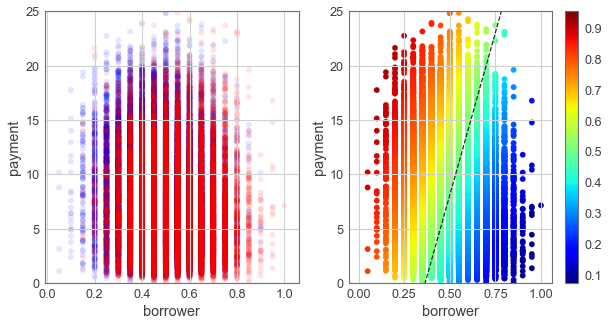

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.1)
plt.xlabel('borrower')
plt.ylabel('payment')
plt.ylim([0,25])
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=lda.predict_proba(X)[:,0], cmap='jet')
plt.plot([0, 1], [-lda.intercept_[0]/lda.coef_[0][1], 
                  -(lda.intercept_[0]+lda.coef_[0][0])/lda.coef_[0][1]], 'k--')
plt.xlabel('borrower')
plt.ylabel('payment')
plt.ylim([0,25])
plt.colorbar()

In [61]:
X_lda = lda.transform(X)

array([[ 1.6835943 ],
       [ 2.4627947 ],
       [ 0.4997118 ],
       ...,
       [ 0.12576334],
       [ 1.21752228],
       [-0.43399163]])

Text(0.5,0,'LD_1')

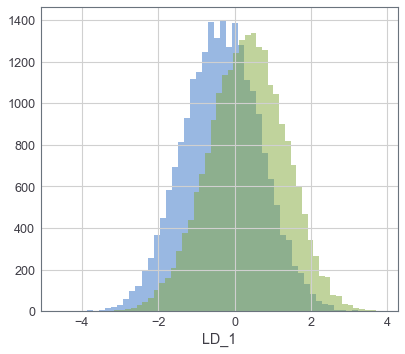

In [65]:
plt.hist(X_lda[y==0], bins=50, alpha=0.5)
plt.hist(X_lda[y==1], bins=50, alpha=0.5)
plt.xlabel('LD_1')

## Logistic Regression

In [66]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 25 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [76]:
df_loan['purpose_'].value_counts()

debt_consolidation    25570
credit_card            7688
other                  4886
home_improvement       2977
major_purchase         2060
small_business         1513
medical                 648
Name: purpose_, dtype: int64

In [77]:
df_loan['home_'].value_counts()

MORTGAGE    20876
RENT        20744
OWN          3722
Name: home_, dtype: int64

In [78]:
df_loan['emp_len_'].value_counts()

 > 1 Year    43566
 < 1 Year     1776
Name: emp_len_, dtype: int64

In [99]:
from tensorflow import keras

def one_hot_encoder(df, name, dof=False):
    X = df[name].values
    X = LabelEncoder().fit_transform(X)
    X = keras.utils.to_categorical(X)
    return X if not dof else X[:,:len(X[0])-1]

X_0 = df_loan[['payment_inc_ratio']].values
X_1 = one_hot_encoder(df_loan, 'purpose_', dof=True)
X_2 = one_hot_encoder(df_loan, 'home_', dof=True)
X_3 = one_hot_encoder(df_loan, 'emp_len_', dof=True)
X_4 = df_loan[['borrower_score']].values
y = one_hot_encoder(df_loan, 'outcome', dof=True).ravel()

X = np.hstack((X_0, X_1, X_2, X_3, X_4))

In [102]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(X, y)
accuracy_score(y, logit_reg.predict(X))

0.6366944554717481

Text(0,0.5,'Prob')

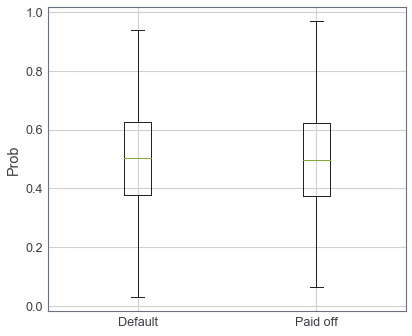

In [112]:
plt.boxplot(logit_reg.predict_proba(X), sym='k')
plt.xticks(range(1,3), ['Default', 'Paid off'])
plt.ylabel('Prob')

In [119]:
np.exp(logit_reg.coef_)

array([[1.08316272, 0.30548897, 0.39168971, 0.45861709, 0.38446982,
        0.51083034, 0.56777416, 0.85510489, 0.89731622, 1.42628819,
        0.01036053]])

Text(0,0.5,'Partial Residual')

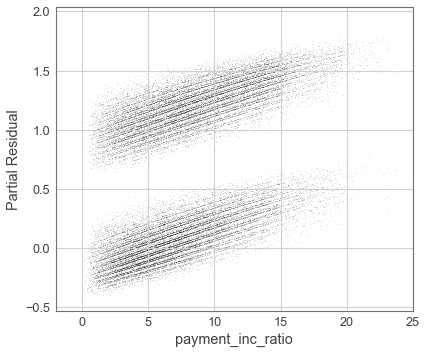

In [136]:
partialRes = y - logit_reg.predict_proba(X)[:,0] + 1./(1 + 
                            np.exp(-logit_reg.coef_[0][0] * X[:,0].ravel()))
plt.scatter(X[:,0], partialRes, alpha=0.5, s=0.1, c='k')
plt.xlim([-2,25])
plt.xlabel('payment_inc_ratio')
plt.ylabel('Partial Residual')

### Evaluating Classification Models

In [137]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logit_reg.predict(X))

array([[14529,  8142],
       [ 8331, 14340]])

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y, logit_reg.predict(X)))

             precision    recall  f1-score   support

        0.0       0.64      0.64      0.64     22671
        1.0       0.64      0.63      0.64     22671

avg / total       0.64      0.64      0.64     45342



In [157]:
recall = []
specificity = []
for threshold in np.arange(0,1,0.01):
    tp, fn, fp, tn = confusion_matrix(y, 
        np.array(logit_reg.predict_proba(X)[:,1].ravel()>threshold).astype(int)).ravel()
    recall.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

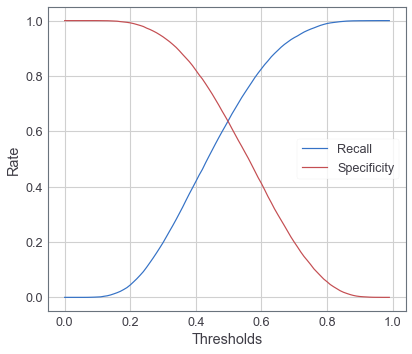

In [165]:
plt.plot(np.arange(0,1,0.01), recall, 'b-', label='Recall')
plt.plot(np.arange(0,1,0.01), specificity, 'r-', label='Specificity')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()

Text(0,0.5,'Recall')

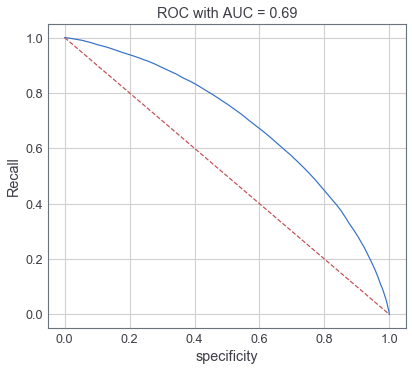

In [168]:
from sklearn.metrics import auc

plt.plot(specificity, recall, 'b-')
plt.plot([0,1], [1,0], 'r--')
plt.title('ROC with AUC = {0:.2f}'.format(auc(specificity, recall)))
plt.xlabel('specificity')
plt.ylabel('Recall')

In [176]:
a = pd.DataFrame(data={'1': ['abcd'] * 4, '2': ['dcba'] * 4})
print(a)
a['1'].apply(lambda x: x[:2])

      1     2
0  abcd  dcba
1  abcd  dcba
2  abcd  dcba
3  abcd  dcba


0    ab
1    ab
2    ab
3    ab
Name: 1, dtype: object

# Loan Full Data

In [184]:
df_loan_full = pd.read_csv('../input/full_train_set.csv')
df_loan_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119987 entries, 0 to 119986
Data columns (total 19 columns):
status               119987 non-null object
loan_amnt            119987 non-null int64
term                 119987 non-null object
annual_inc           119987 non-null int64
dti                  119987 non-null float64
payment_inc_ratio    119987 non-null float64
revol_bal            119987 non-null float64
revol_util           119987 non-null float64
purpose              119987 non-null object
home_ownership       119987 non-null object
delinq_2yrs_zero     119987 non-null int64
pub_rec_zero         119987 non-null int64
open_acc             119987 non-null int64
grade                119987 non-null float64
outcome              119987 non-null object
emp_length           119987 non-null int64
purpose_             119987 non-null object
home_                119987 non-null object
emp_len_             119987 non-null object
dtypes: float64(5), int64(6), object(8)
memory usage: 

In [185]:
df_loan_full['outcome'].value_counts()

paid off    97316
default     22671
Name: outcome, dtype: int64

In [187]:
from tensorflow import keras

def one_hot_encoder(df, name, dof=False):
    X = df[name].values
    X = LabelEncoder().fit_transform(X)
    X = keras.utils.to_categorical(X)
    return X if not dof else X[:,:len(X[0])-1]

X_0 = df_loan_full[['payment_inc_ratio']].values
X_1 = one_hot_encoder(df_loan_full, 'purpose_', dof=True)
X_2 = one_hot_encoder(df_loan_full, 'home_', dof=True)
X_3 = one_hot_encoder(df_loan_full, 'emp_len_', dof=True)
#X_4 = df_loan_full[['borrower_score']].values
y = one_hot_encoder(df_loan_full, 'outcome', dof=True).ravel()

X = np.hstack((X_0, X_1, X_2, X_3))

In [188]:
logit_reg.fit(X, y)
accuracy_score(y, logit_reg.predict(X))

0.8105044713177261

In [189]:
np.mean(logit_reg.predict(X) > 0)

0.0019168743280522057

In [209]:
n0 = df_loan_full.groupby('outcome')['purpose'].count()[0]
n1 = df_loan_full.groupby('outcome')['purpose'].count()[1]

select = lambda x: n1 / (n0 + n1) if x == 0 else n0 / (n0 + n1)
weight = pd.DataFrame(data={'tmp': y})['tmp'].apply(lambda x: 
                            n1 / (n0 + n1) if x == 0 else n0 / (n0 + n1))

In [210]:
logit_reg.fit(X, y, weight)
accuracy_score(y, logit_reg.predict(X))

0.811054530907515

In [211]:
np.mean(logit_reg.predict(X) > 0)

1.6668472417845268e-05